# This is a IPython notebook for conducting two way anova test

In [93]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

import scipy

In [94]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [95]:
def two_way_anova(value, group1, group2):
    formula = value + ' ~ C(' + group1 + ') + C(' + group2 + ') + C(' + group1 + '):C(' + group2 + ')'
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    
    eta_squared(aov_table)
    omega_squared(aov_table)
    
    print(aov_table)

In [96]:
def independent_samples_t_test():
    data1 = data.Score
    data2 = data.Zeit
    
    twosample_results = scipy.stats.ttest_ind(data1, data2)

    print(twosample_results)

In [97]:
datafile = "players.csv"
data = pd.read_csv(datafile)

independent_samples_t_test()

Ttest_indResult(statistic=-119.02728358173742, pvalue=1.2175314329142074e-162)


In [98]:
two_way_anova('Zeit', 'Position2', 'Age')

                           sum_sq    df          F    PR(>F)    eta_sq  \
C(Position2)         1.608441e+05   1.0   7.196326  0.008873  0.064628   
C(Age)               4.906984e+05   1.0  21.954335  0.000011  0.197164   
C(Position2):C(Age)  4.917082e+04   1.0   2.199952  0.141944  0.019757   
Residual             1.788069e+06  80.0        NaN       NaN       NaN   

                     omega_sq  
C(Position2)         0.055152  
C(Age)               0.186508  
C(Position2):C(Age)  0.010680  
Residual                  NaN  


In [99]:
analysis('Score', 'Position2', 'Age')

                          sum_sq    df         F    PR(>F)    eta_sq  omega_sq
C(Position2)          162.909744   1.0  1.854903  0.177037  0.021004  0.009572
C(Age)                553.659081   1.0  6.304007  0.014062  0.071385  0.059389
C(Position2):C(Age)    13.272003   1.0  0.151116  0.698504  0.001711 -0.009505
Residual             7026.123214  80.0       NaN       NaN       NaN       NaN


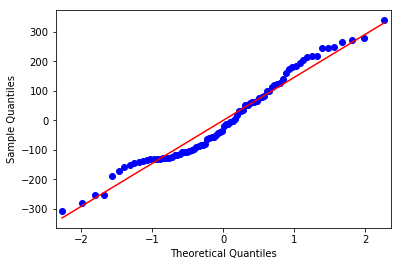

In [100]:
res = model.resid 
fig = sm.qqplot(res, line='s')

plt.show()